In [106]:
!pip install kaggle

In [107]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [108]:
cp kaggle.json ~/.kaggle/

In [109]:
! chmod 600 ~/.kaggle/kaggle.json

In [110]:
! kaggle datasets download atharvaingle/crop-recommendation-dataset

crop-recommendation-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [111]:
#link_for_ds = "https://www.kaggle.com/atharvaingle/what-crop-to-grow/data"

In [112]:
!unzip crop-recommendation-dataset

Archive:  crop-recommendation-dataset.zip
replace Crop_recommendation.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [113]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_csv('Crop_recommendation.csv')

In [115]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [116]:
df.size

17600

In [117]:
df.shape

(2200, 8)

In [118]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [119]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [120]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [121]:
df['label'].value_counts()

lentil         100
maize          100
watermelon     100
blackgram      100
chickpea       100
mango          100
kidneybeans    100
apple          100
grapes         100
coffee         100
pigeonpeas     100
mungbean       100
muskmelon      100
pomegranate    100
orange         100
cotton         100
coconut        100
mothbeans      100
jute           100
rice           100
banana         100
papaya         100
Name: label, dtype: int64

In [127]:
df=df.set_index('label')

In [128]:
df=df.drop('apple')

In [129]:
df = df.reset_index()

In [130]:
df

,label,N,P,K,temperature,humidity,ph,rainfall
0,rice,90,42,43,20.879744,82.002744,6.502985,202.935536
1,rice,85,58,41,21.770462,80.319644,7.038096,226.655537
2,rice,60,55,44,23.004459,82.320763,7.840207,263.964248
3,rice,74,35,40,26.491096,80.158363,6.980401,242.864034
4,rice,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...,...
2095,coffee,107,34,32,26.774637,66.413269,6.780064,177.774507
2096,coffee,99,15,27,27.417112,56.636362,6.086922,127.924610
2097,coffee,118,33,30,24.131797,67.225123,6.362608,173.322839
2098,coffee,117,32,34,26.272418,52.127394,6.758793,127.175293


In [131]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'orange',
       'papaya', 'coconut', 'cotton', 'jute', 'coffee'], dtype=object)

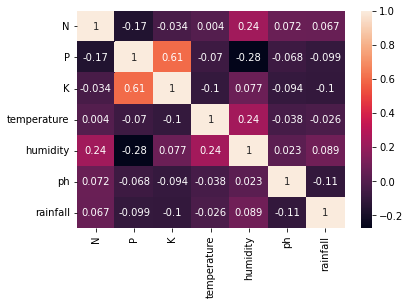

In [134]:
sns.heatmap(df.corr(),annot=True)

In [135]:
#Seperating features and target label

features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [136]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [137]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [138]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  92.61904761904762
              precision    recall  f1-score   support

      banana       0.91      1.00      0.95        20
   blackgram       0.72      0.95      0.82        22
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        19
      coffee       1.00      0.95      0.98        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        13
        jute       1.00      0.29      0.45        17
 kidneybeans       1.00      0.85      0.92        20
      lentil       0.91      0.77      0.83        13
       maize       0.77      0.94      0.85        18
       mango       1.00      1.00      1.00        18
   mothbeans       0.81      0.62      0.70        21
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        21
      papaya       1.00      0.93

In [139]:
from sklearn.model_selection import cross_val_score

In [140]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [141]:
score

array([0.9547619 , 0.92857143, 0.93333333, 0.9452381 , 0.94285714])

### Saving trained Decision Tree model

In [142]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [143]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.9904761904761905
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        13
        jute       0.85      1.00      0.92        17
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.93      1.00      0.96        13
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      0.95      0.98        21
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00 

In [144]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99761905, 0.9952381 , 0.9952381 , 0.9952381 , 0.99047619])

### Saving trained Guassian Naive Bayes model

In [145]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [146]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.0880952380952381
              precision    recall  f1-score   support

      banana       1.00      0.10      0.18        20
   blackgram       1.00      0.09      0.17        22
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.11      0.19        19
      coffee       0.00      0.00      0.00        21
      cotton       1.00      0.05      0.09        22
      grapes       0.03      1.00      0.06        13
        jute       1.00      0.06      0.11        17
 kidneybeans       1.00      0.05      0.10        20
      lentil       1.00      0.15      0.27        13
       maize       0.00      0.00      0.00        18
       mango       1.00      0.11      0.20        18
   mothbeans       0.00      0.00      0.00        21
    mungbean       1.00      0.04      0.08        23
   muskmelon       1.00      0.25      0.40        24
      orange       0.00      0.00      0.00        21
      papaya       0.00      0.00      0.0

In [147]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27142857, 0.28333333, 0.27857143, 0.26428571, 0.26666667])

# Logistic Regression

In [148]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.95
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        20
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        19
      coffee       0.95      1.00      0.98        21
      cotton       0.95      0.95      0.95        22
      grapes       1.00      1.00      1.00        13
        jute       0.79      0.88      0.83        17
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.67      0.92      0.77        13
       maize       0.94      0.94      0.94        18
       mango       1.00      1.00      1.00        18
   mothbeans       0.84      0.76      0.80        21
    mungbean       1.00      0.87      0.93        23
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1

In [149]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.94761905, 0.96428571, 0.9452381 , 0.9547619 , 0.93809524])

### Saving trained Logistic Regression model

In [150]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [151]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9880952380952381
              precision    recall  f1-score   support

      banana       0.95      1.00      0.98        20
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        13
        jute       0.81      1.00      0.89        17
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        13
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        21
      papaya       1.00      0.96      0.98

In [152]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99761905, 0.98809524, 0.99285714, 0.99285714, 0.98571429])

### Saving trained Random Forest model

In [153]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [154]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  1.0
              precision    recall  f1-score   support

      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        19
      coffee       1.00      1.00      1.00        21
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        13
        jute       1.00      1.00      1.00        17
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        13
       maize       1.00      1.00      1.00        18
       mango       1.00      1.00      1.00        18
   mothbeans       1.00      1.00      1.00        21
    mungbean       1.00      1.00      1.00        23
   muskmelon       1.00      1.00      1.00        24
      orange       1.00      1.00      1.00        21
      papaya       1.00      1.00      1.00        27

In [155]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.98571429, 0.99047619, 0.9952381 , 0.99047619, 0.98333333])

### Saving trained XGBoost model

In [156]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

## Accuracy Comparison

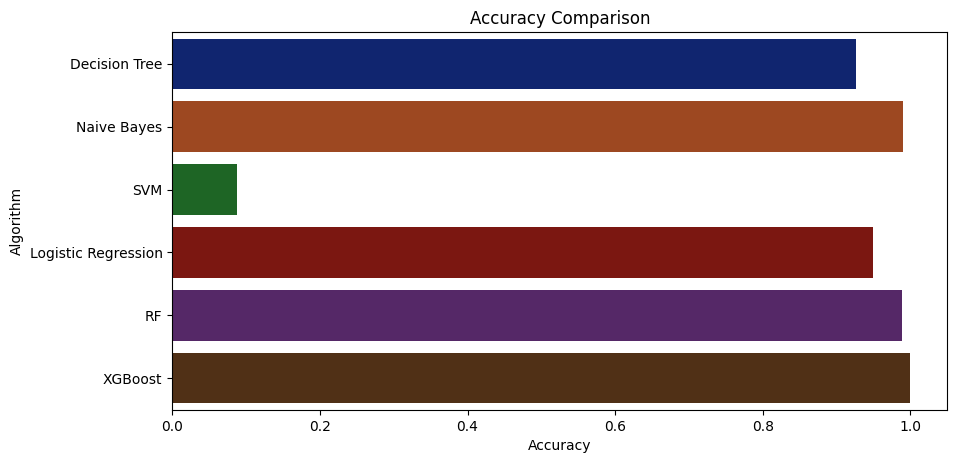

In [157]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [158]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9261904761904762
Naive Bayes --> 0.9904761904761905
SVM --> 0.0880952380952381
Logistic Regression --> 0.95
RF --> 0.9880952380952381
XGBoost --> 1.0


## Making a prediction

In [159]:
data = np.array([[10,18, 3, 13.603016, 50.3, 8.7, 130.98]])
prediction = RF.predict(data)
print(prediction)

['orange']


In [160]:
data = np.array([[100, 65, 88, 40, 61.13, 17.4, 123.45]])
prediction = RF.predict(data)
print(prediction)

['coffee']
